<a href="https://colab.research.google.com/github/EWECORP/DScience_41870/blob/main/Proyecto_Final_Eduardo_Ettlin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

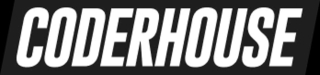

# **CURSO DE DATA SCIENCE**
## **PROYECTO FINAL**

*AUTOR:Eduardo ETTLIN

# Introducción

Según datos de la Organización Mundial de la Salud (OMS), en el mundo mueren aproximadamente 1,35 millones de personas cada año debido a accidentes de tráfico. Estos accidentes representan una importante causa de mortalidad a nivel global y afectan a personas de todas las edades. Además, las lesiones por accidentes de tráfico se sitúan como la octava causa principal de muerte en todo el mundo para todas las edades y son la principal causa de muerte entre niños y jóvenes de 5 a 29 años. Es importante destacar que la cantidad de personas que pierden la vida en accidentes de tráfico supera en la actualidad la cifra de personas fallecidas debido al VIH/SIDA. Estos datos resaltan la importancia de implementar medidas de seguridad vial eficaces para prevenir accidentes y proteger la vida de las personas en todo el mundo.



Accidentes en EE. UU. (2016 - 2021)
Un conjunto de datos de accidentes de tráfico en todo el país (2016 - 2021)


**Acerca del conjunto de datos**

*Descripción*

Este es un conjunto de datos de accidentes automovilísticos de todo el país, que cubre 49 estados de los EE. UU. Los datos de accidentes se recopilan desde febrero de 2016 hasta diciembre de 2021, utilizando múltiples API que proporcionan transmisión de datos de incidentes (o eventos) de tráfico. Estas API transmiten datos de tráfico capturados por una variedad de entidades, como los departamentos de transporte estatales y de EE. UU., agencias de aplicación de la ley, cámaras de tráfico y sensores de tráfico dentro de las redes de carreteras. Actualmente, hay alrededor de 2,8 millones de registros de accidentes en este conjunto de datos.
"Se entrega el siguiente set de datos con nombre “US_Accidents_Dec21_updated.csv”.

**Contenido**

Este conjunto de datos se ha recopilado en tiempo real mediante varias API de tráfico. Actualmente, contiene datos de accidentes recopilados desde febrero de 2016 hasta diciembre de 2021 para los Estados Unidos contiguos.

**Inspiración**

US-Accidentes” se puede utilizar para numerosas aplicaciones, como la predicción de accidentes automovilísticos en tiempo real, el estudio de ubicaciones de puntos críticos de accidentes automovilísticos, el análisis de víctimas y la extracción de reglas de causa y efecto para predecir accidentes automovilísticos, y el estudio del impacto de la precipitación u otros estímulos ambientales en la ocurrencia de accidentes. La publicación más reciente del conjunto de datos también puede ser útil para estudiar el impacto de COVID-19 en el comportamiento del tráfico y los accidentes.

**Cobertura**

El conjunto de datos cubre 49 estados de los EE. UU. El siguiente diagrama muestra la distribución actual de datos en todos los estados.

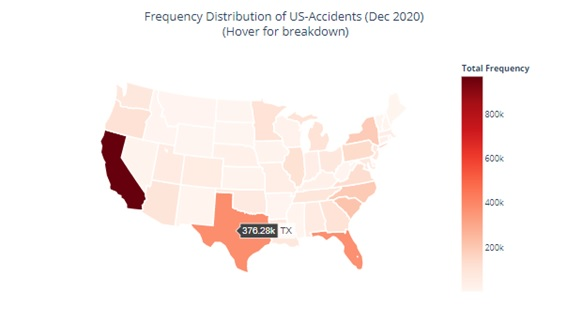

#**Introducción**

**Contexto empresarial.**

Estados Unidos ha experimentado un aumento en el número de accidentes en las carreteras. Quieren saber si el número de accidentes ha aumentado en las últimos meses. Para todos los accidentes reportados, han recopilado detalles para cada accidente y han estado manteniendo registros durante los últimos 5 años(desde 2016 hasta 2021).

El cliente nos ha contratado para que construyas visualizaciones que les ayuden a identificar patrones en accidentes, lo que les ayudaría a tomar acciones preventivas para reducir la cantidad de accidentes en el futuro. Tienen ciertos parámetros como geologalización, hora del día, condiciones climáticas, gravedad del accidente, etc. De los que se preocupan y de los que les gustaría obtener información específica.

**Problema comercial.**

Nuestra tarea es formatear los datos proporcionados y proporcionar visualizaciones que respondan las preguntas específicas que tiene el cliente, que se mencionan a continuación.

**Contexto analítico.**

 Se le proporciona un archivo CSV (almacenado en la carpeta datos ya creada) que contiene detalles sobre cada accidente, como fecha, hora, ubicación del accidente, gravedad del accidente,etc. El delimitador en el archivo CSV dado es el signo (;) en lugar del predeterminado (,). Realizará las siguientes tareas con los datos:

Extraiga datos adicionales compementarios

Leer, transformar y preparar datos para su visualización

Realizar análisis y construir visualizaciones de los datos para identificar patrones en el conjunto de datos.

El cliente tiene un conjunto específico de preguntas a las que le gustaría obtener respuestas. Deberá proporcionar visualizaciones para acompañar estos:

1- ¿Cómo ha fluctuado el número de accidentes durante el último año y medio? ¿Han aumentado con el tiempo?.

2- Para un día en particular, ¿durante qué horas es más probable que ocurran accidentes?.

3- ¿Hay más accidentes entre semana que durante los fines de semana?.

4- ¿Cuál es la proporción de recuento de accidentes por estado o cuidad?

5- ¿Qué distritos tienen un número desproporcionadamente grande de accidentes para su tamaño?

6- Para cada municipio, ¿durante qué horas es más probable que ocurran accidentes?

In [1]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip -q #quiet mode

  Preparing metadata (setup.py) ... done


Un Notebook (Colab o Jupyter) que debe contener:
* **Abstracto con motivación y audiencia**:  Descripción de alto nivel de lo que motiva a analizar los datos elegidos y audiencia que se podría beneficiar de este análisis.
* **Preguntas/Problema que buscamos resolver**: Si bien puede haber más de una problemática a resolver, la problemática principal debe encuadrarse como un problema de clasificación o regresión.
* **Breve Análisis Exploratorio de Datos (EDA)**: Análisis descriptivo de los datos mediante visualizaciones y herramientas estadísticas, análisis de valores faltantes.
* **Ingeniería de atributos**: Creación de nuevas variables, transformación de variables existentes (i.e normalización de variables, encoding, etc.)
* **Entrenamiento y Testeo**: Entrenamiento y testeo de al menos 2 modelos distintos de Machine Learning utilizando algún método de validación cruzada.
* **Optimización**: Utilizar alguna técnica de optimización de hiperparámetros (e.g gridsearch, randomizedsearch, etc.)
* **Selección de modelos**: utilizar las métricas apropiadas para la selección del mejor modelo (e.g AUC, MSE, etc.)




In [2]:
#Conectamos mi drive
from google.colab import drive
#Importamos OS
import os
#Montamos drive
drive.mount('/content/gdrive', force_remount=True)
# Establecer ruta de acceso en drive
import os
print(os.getcwd())


Mounted at /content/gdrive
/content


In [3]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Preprocesado y modelado
# ==============================================================================
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score,silhouette_score,silhouette_samples,calinski_harabasz_score
from sklearn.preprocessing import StandardScaler


# Visualizacion de Datos
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import HalvingRandomSearchCV

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')


#import pandas_profilingn # `import pandas_profiling` is going to be deprecated by April 1st.
import ydata_profiling


In [4]:
from ydata_profiling.utils.cache import cache_file


In [5]:
# Me muevo a la carpeta
os.chdir("/content/gdrive/MyDrive/DScience_41870")
print(os.getcwd())

#Lectura del dataframe
datos=pd.read_csv('/content/gdrive/MyDrive/DScience_41870/US_Accidents_Dec21_updated.csv',sep=',',nrows=2900000 )  # nrows: 1500000  # Disminuir Tamaño a 1.5 MM (Riginalmente Tiene 2.845.342 registros)
datos.head()


/content/gdrive/MyDrive/DScience_41870


,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [6]:
#Veamos el shape
datos.shape

(2845342, 47)

In [7]:
#Tipo de estructura del dataset
datos.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


# DATOS
## Detalle explicativo de los campos

Descripción de todas y cada una de las columnas: estos datos se componen de 46 columnas y 7,728,394 filas

**ID**: Este es un identificador único del registro de accidente.

**Source**: Fuente de datos brutos de accidentes.

**Severity**: muestra la gravedad del accidente, un número entre 1 y 4, donde 1 indica el menor impacto en el tráfico (es decir, un retraso corto como resultado del accidente) y 4 indica un impacto significativo en el tráfico (es decir, un retraso largo) .

**Start_Time**: Muestra la hora de inicio del accidente en la zona horaria local.

**End_Time**: Muestra la hora de finalización del accidente en la zona horaria local. El tiempo de finalización aquí se refiere a cuando se descartó el impacto del accidente en el flujo de tráfico.

**Start_Lat**: Muestra la latitud en coordenadas GPS del punto de inicio.

**Start_Lng**: Muestra la longitud en coordenadas GPS del punto de inicio.

**End_Lat**: Muestra la latitud en coordenadas GPS del punto final.

**End_Lng**: Muestra la longitud en coordenadas GPS del punto final.

**Distance(mi)**: La longitud de la carretera afectada por el accidente en millas.

**Descripción**: Muestra una descripción del accidente proporcionada por un ser humano.

**Street**: muestra el nombre de la calle en el campo de dirección.

**City**: Muestra la ciudad en el campo de dirección.

**Conty**: muestra el condado en el campo de dirección.

**State**: muestra el estado en el campo de dirección.

**Zipcode**: muestra el código postal en el campo de dirección.

**Contry**: Muestra el país en el campo de dirección.

**Timezone**: muestra la zona horaria según la ubicación del accidente (este, centro, etc.).

**Airport_Code**: Indica una estación meteorológica ubicada en el aeropuerto que es la más cercana al lugar del accidente.

**Weather_Timestamp**: muestra la marca de tiempo del registro de observación meteorológica (en hora local).

**Temperature(F)**: Muestra la temperatura (en Fahrenheit).

**Wind_Chill(F)**: Muestra la sensación térmica (en Fahrenheit).

**Humedad(%)**: Muestra la humedad (en porcentaje).

**Pressure(in)**: Muestra la presión del aire (en pulgadas).

**Visibility(mi)**: Muestra la visibilidad (en millas).

**Wind_Direction**: Muestra la dirección del viento.

**Wind_Speed(mph)**: Muestra la velocidad del viento (en millas por hora).

**Precipitation(in)**: muestra la cantidad de precipitación en pulgadas, si la hay.

**Weather_Condition**: Muestra las condiciones climáticas (lluvia, nieve, tormenta, niebla, etc.)

**Amenity**: una anotación de PDI que indica la presencia de servicios en una ubicación cercana.

**Bump**: una anotación de PDI que indica la presencia de un badén o un joroba en una ubicación cercana.

**Crossing**: una anotación de PDI que indica la presencia de un cruce en un lugar cercano.

**Give_Way**: una anotación de PDI que indica la presencia de Give_way en una ubicación cercana.

**Junction**: una anotación de PDI que indica la presencia de un cruce en una ubicación cercana.

**No_Exit**: una anotación de PDI que indica la presencia de no_exit en una ubicación cercana.

**Railway**: una anotación de PDI que indica la presencia de un ferrocarril en una ubicación cercana.

**Junction**: una anotación de PDI que indica la presencia de una rotonda en una ubicación cercana.

**Station**: una anotación de PDI que indica la presencia de una estación en una ubicación cercana.

**Stop**: una anotación de PDI que indica la presencia de una parada en una ubicación cercana.

**Traffic_Calming**: una anotación de PDI que indica la presencia de reductor de volocidad en una ubicación cercana.

**Traffic_Signal**: una anotación de PDI que indica la presencia de Traffic_signal en una ubicación cercana.

**Turning_Loop**: una anotación de PDI que indica la presencia de Turning_loop en una ubicación cercana.

**Sunrise_Sunset**: muestra el período del día (es decir, día o noche) según el amanecer/atardecer.

**Civil_Twilight**: muestra el período del día (es decir, día o noche) según el crepúsculo civil.

**Nautical_Twilight**: muestra el período del día (es decir, día o noche) según el crepúsculo náutico.

**Astronomical_Twilight**: muestra el período del día (es decir, día o noche) según el crepúsculo astronómico.

# **PREPROCESAMIENTO DE DATOS**

In [8]:
datos.duplicated().sum()

0

No Hay Datos Duplicados !!!

In [9]:
datos = datos.dropna(thresh=40)
datos

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


##Llenar valores faltantes

In [10]:
datos.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1705507
Street                         1
Side                           0
City                         117
County                         0
State                          0
Zipcode                        0
Country                        0
Timezone                       0
Airport_Code                   0
Weather_Timestamp              0
Temperature(F)             12496
Wind_Chill(F)             412841
Humidity(%)                16314
Pressure(in)                3780
Visibility(mi)             13842
Wind_Direction             20077
Wind_Speed(mph)           101152
Precipitation(in)         495549
Weather_Condition          13991
Amenity   

In [11]:
# rellenar valores faltantes con el método de interpolación
# límite es el número máximo de NaN consecutivos para completar. Debe ser mayor que 0.
datos.fillna(method='ffill', limit=5, inplace=True)
datos.fillna(method='bfill', limit=5, inplace=True)

In [12]:
datos.isnull().sum()

ID                            0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                       0
End_Lng                       0
Distance(mi)                  0
Description                   0
Number                   129009
Street                        0
Side                          0
City                          0
County                        0
State                         0
Zipcode                       0
Country                       0
Timezone                      0
Airport_Code                  0
Weather_Timestamp             0
Temperature(F)                0
Wind_Chill(F)            257669
Humidity(%)                   0
Pressure(in)                  0
Visibility(mi)                0
Wind_Direction                0
Wind_Speed(mph)             223
Precipitation(in)        237253
Weather_Condition             0
Amenity                       0
Bump    

In [13]:
datos.drop(columns=['End_Lat', 'End_Lng'],inplace= True)
datos.dropna(subset=['Wind_Chill(F)','Wind_Speed(mph)','Precipitation(in)'],inplace = True)

In [14]:
datos.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'Distance(mi)', 'Description', 'Number', 'Street', 'Side', 'City',
       'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [15]:
datos.isnull().sum()

ID                           0
Severity                     0
Start_Time                   0
End_Time                     0
Start_Lat                    0
Start_Lng                    0
Distance(mi)                 0
Description                  0
Number                   67120
Street                       0
Side                         0
City                         0
County                       0
State                        0
Zipcode                      0
Country                      0
Timezone                     0
Airport_Code                 0
Weather_Timestamp            0
Temperature(F)               0
Wind_Chill(F)                0
Humidity(%)                  0
Pressure(in)                 0
Visibility(mi)               0
Wind_Direction               0
Wind_Speed(mph)              0
Precipitation(in)            0
Weather_Condition            0
Amenity                      0
Bump                         0
Crossing                     0
Give_Way                     0
Junction

## GRAFICOS EXPLORATORIOS

In [16]:
#Autolabel
def autolabel(datos,rotacion):
    for dato in datos:
      height = dato.get_height()
      ax1.annotate('{}'.format(height),
                   xy=(dato.get_x()+dato.get_width()/2,height),
                   xytext=(0,1),
                   textcoords="offset points",
                   ha='center',va='bottom',rotation=rotacion
                   )

In [17]:
# Creación colores aleatorios
import random

def color_aleatorio():
  r, g, b = random.randint(0,255), random.randint(0,255), random.randint(0,255)
  return "#{:02x}{:02x}{:02x}".format(r,g,b)

color = [color_aleatorio() for _ in range(100)]

In [18]:
#Defino los valores para los ejes (X,Y)
Severity_cantidad = datos.groupby('Severity')['Severity'].agg(len)
Severity_tipos = list(datos['Severity'].value_counts().index)

State_cantidad = datos.groupby('State')['State'].agg(len)
State_tipos =list(datos['State'].value_counts().index)

County_cantidad = datos.groupby('County')['County'].agg(len)
County_tipos =list(datos['County'].value_counts().index)

In [19]:
plt.style.use("seaborn-v0_8-bright")  # classic

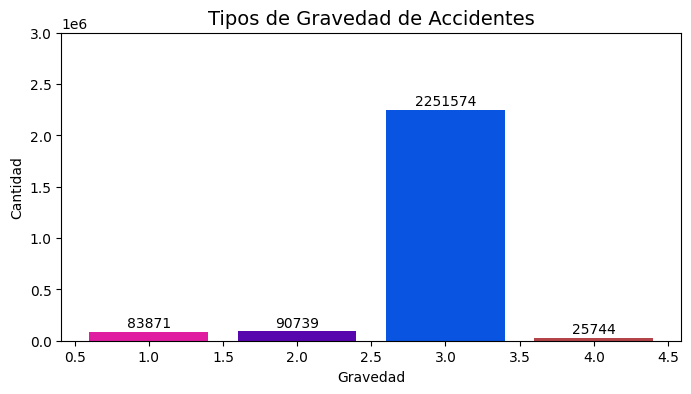

In [20]:
fig, ax1 = plt.subplots(figsize=(8,4))
graf = ax1.bar(sorted(Severity_tipos, reverse = True), Severity_cantidad, color = color)
ax1.set_ylim([0,3000000])
ax1.set_title('Tipos de Gravedad de Accidentes', fontsize= '14')
ax1.set_ylabel('Cantidad', fontsize= '10')
ax1.set_xlabel('Gravedad',fontsize= '10')
autolabel(graf, 0)
plt.show()

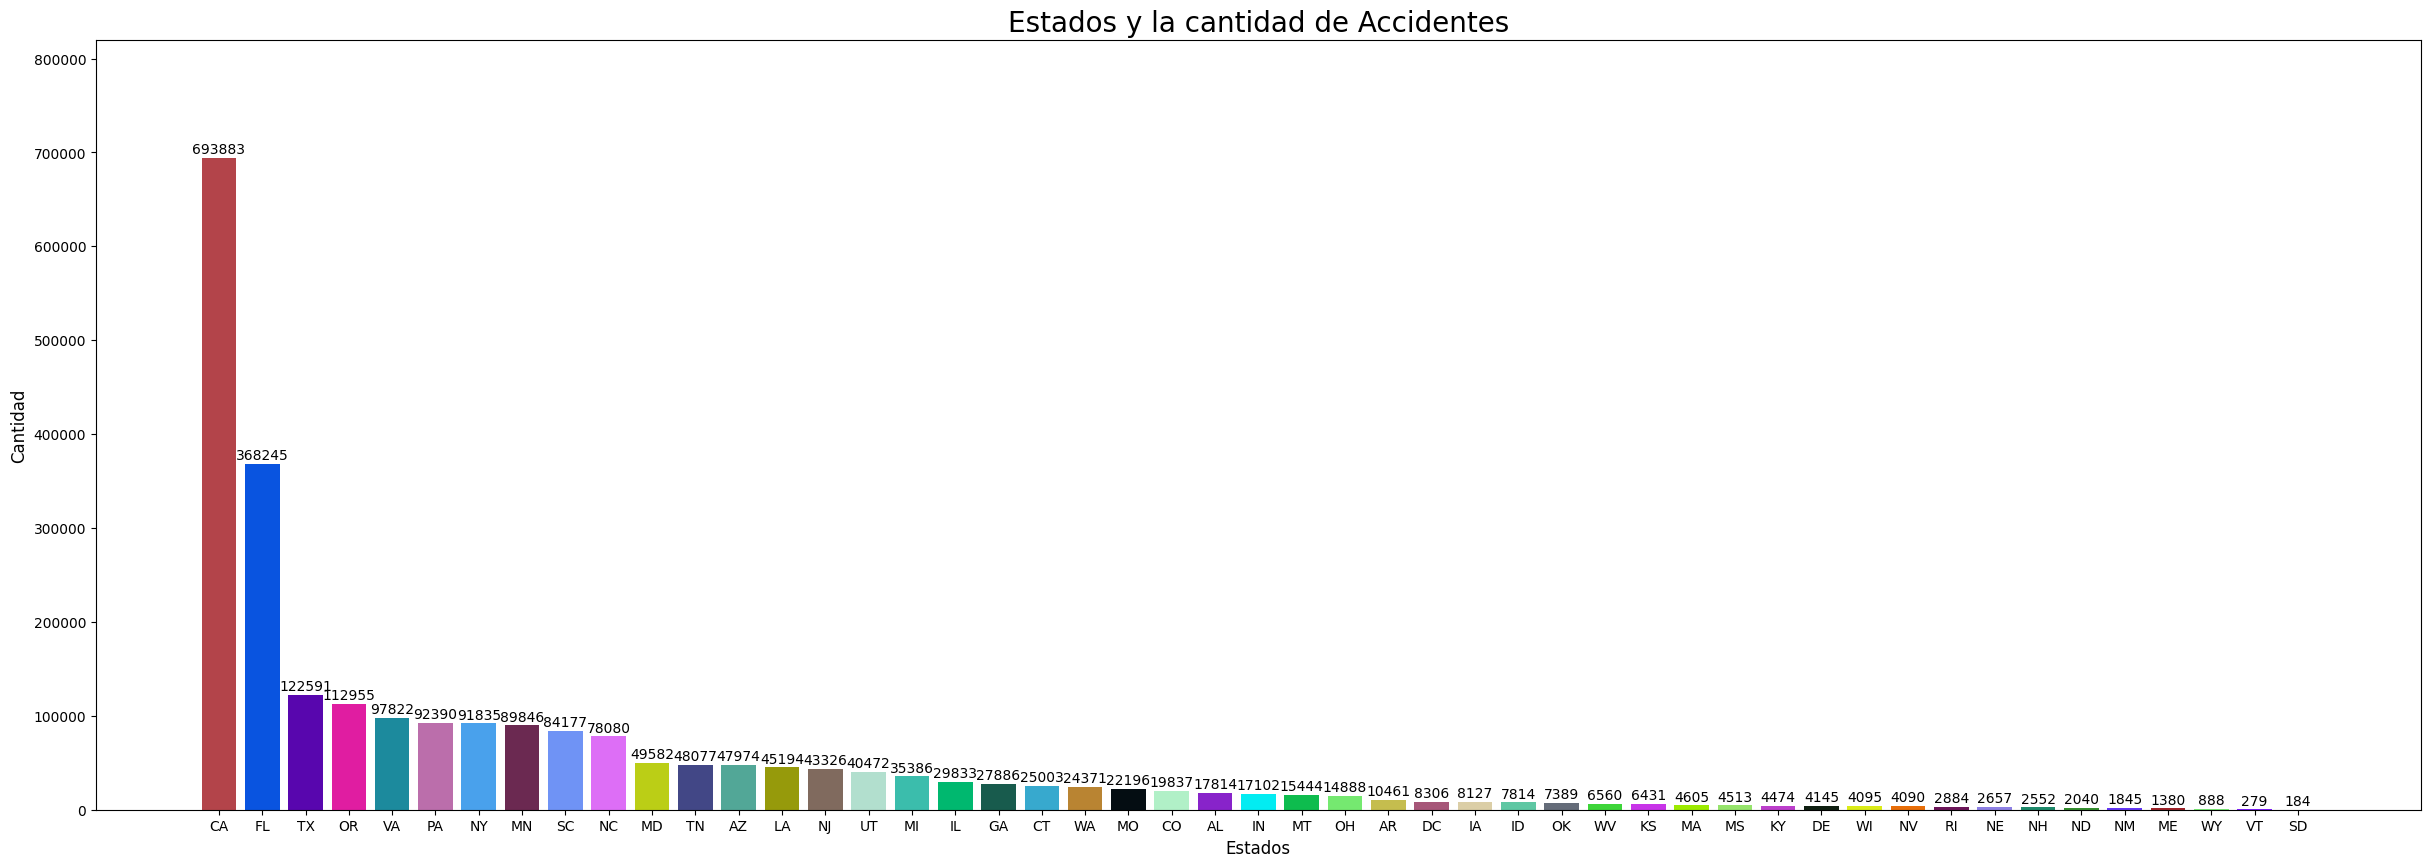

In [21]:
fig, ax1 = plt.subplots(figsize=(30,10))
graf = ax1.bar((State_tipos), sorted(State_cantidad, reverse=True), color = color )
ax1.set_ylim([0,820000])
ax1.set_title('Estados y la cantidad de Accidentes', fontsize= '20')
ax1.set_ylabel('Cantidad', fontsize= '12')
ax1.set_xlabel('Estados',fontsize= '12')
autolabel(graf,0)
plt.show()

## Pregunta de Interés
¿Influyen las Condiciones Climáticas en la Cantidad de Accidentes?

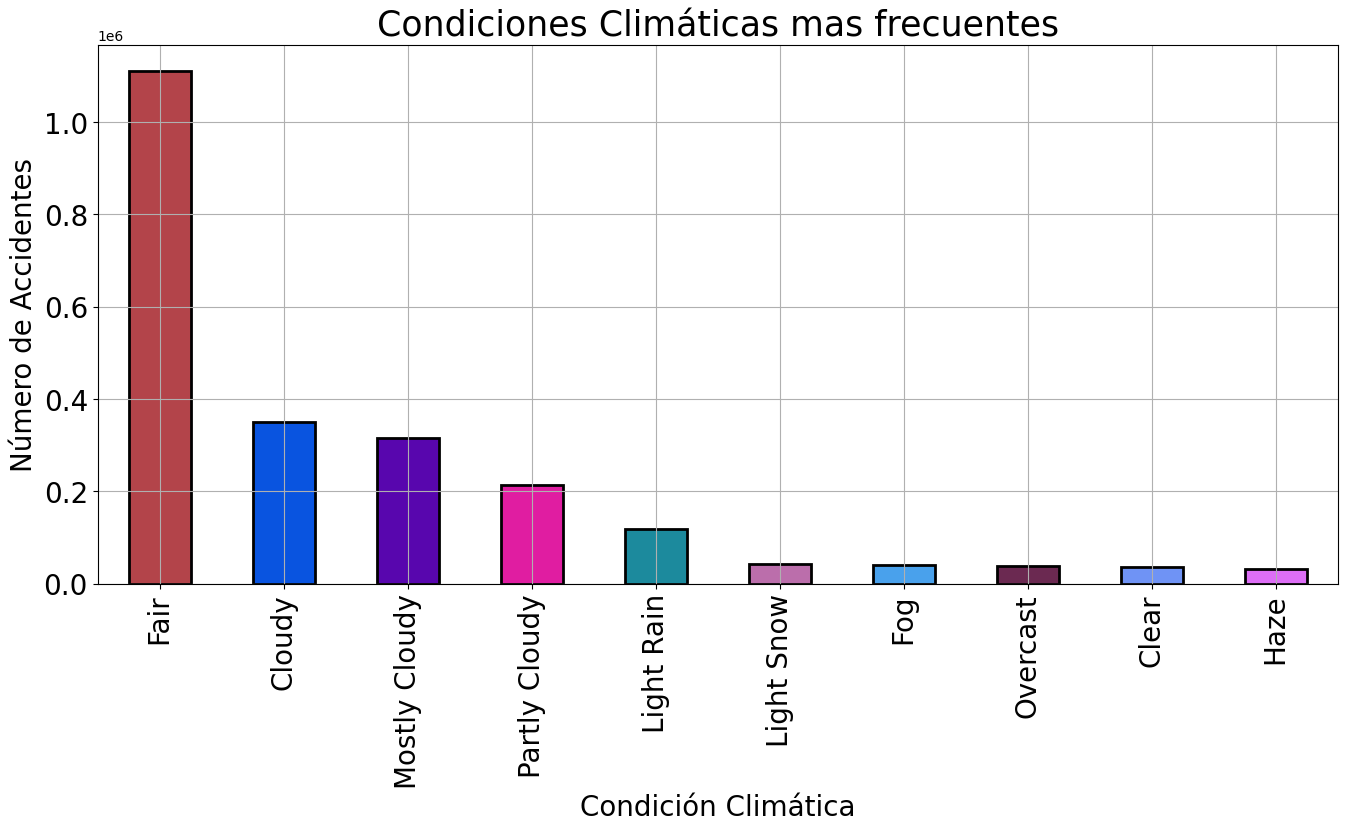

In [22]:
fig, ax=plt.subplots(figsize=(16,7))
datos['Weather_Condition'].value_counts().sort_values(ascending=False).head(10).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2, color = color)
plt.xlabel('Condición Climática',fontsize=20)
plt.ylabel('Número de Accidentes',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('Condiciones Climáticas mas frecuentes',fontsize=25)
plt.grid()
plt.ioff()
plt.show()

## Enriquecer el Modelo
Con variables derivadas de las existentes


In [23]:
datos['Hora'] = pd.to_datetime( datos['Start_Time'],format='%Y-%m-%d %H:%M:%S').dt.hour  # Extraer la HORA del Día en la

In [24]:
datos['Anio_Mes'] =  pd.to_datetime( datos['Start_Time'],format='%Y-%m-%d %H:%M:%S').dt.strftime('%Y-%m')  # Extraer AÑO y MES
datos['day_of_week'] = pd.to_datetime( datos['Start_Time'],format='%Y-%m-%d %H:%M:%S').dt.dayofweek  # Dia de la Semana

days = {0:'Lunes',1:'Martes',2:'Miércoeles',3:'Jueves',4:'Viernes',5:'Sabado',6:'Domingo'}
datos['day_of_week'] = datos['day_of_week'].apply(lambda x: days[x])
datos['Mes'] = pd.to_datetime( datos['Start_Time'],format='%Y-%m-%d %H:%M:%S').dt.strftime('%B')  # Extraer Nombre del MES


In [25]:
## Identificar la Estación Climática
def estacion_climatica(mes):
  if mes.lower() in ('january','february','march'):
    return 'Invierno'
  elif mes.lower() in ('april','may','june'):
    return 'Primavera'
  elif mes.lower() in ('july','august','september'):
    return 'Verano'
  else:
    return 'Otoño'

In [26]:
datos['estacion_meteorologica'] = pd.to_datetime( datos['Start_Time'],format='%Y-%m-%d %H:%M:%S').dt.strftime('%B')  # Extraer Nombre del MES

In [27]:
datos['estacion_meteorologica'] = datos['estacion_meteorologica'].apply(estacion_climatica)

In [28]:
datos.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'Distance(mi)', 'Description', 'Number', 'Street', 'Side', 'City',
       'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Hora', 'Anio_Mes', 'day_of_week', 'Mes',
       'estacion_meteorologica'],
      dtype='object')

## Pregunta de Interes
¿Influye el día de la Semana en la cantidad y Severidad de Accidentes?

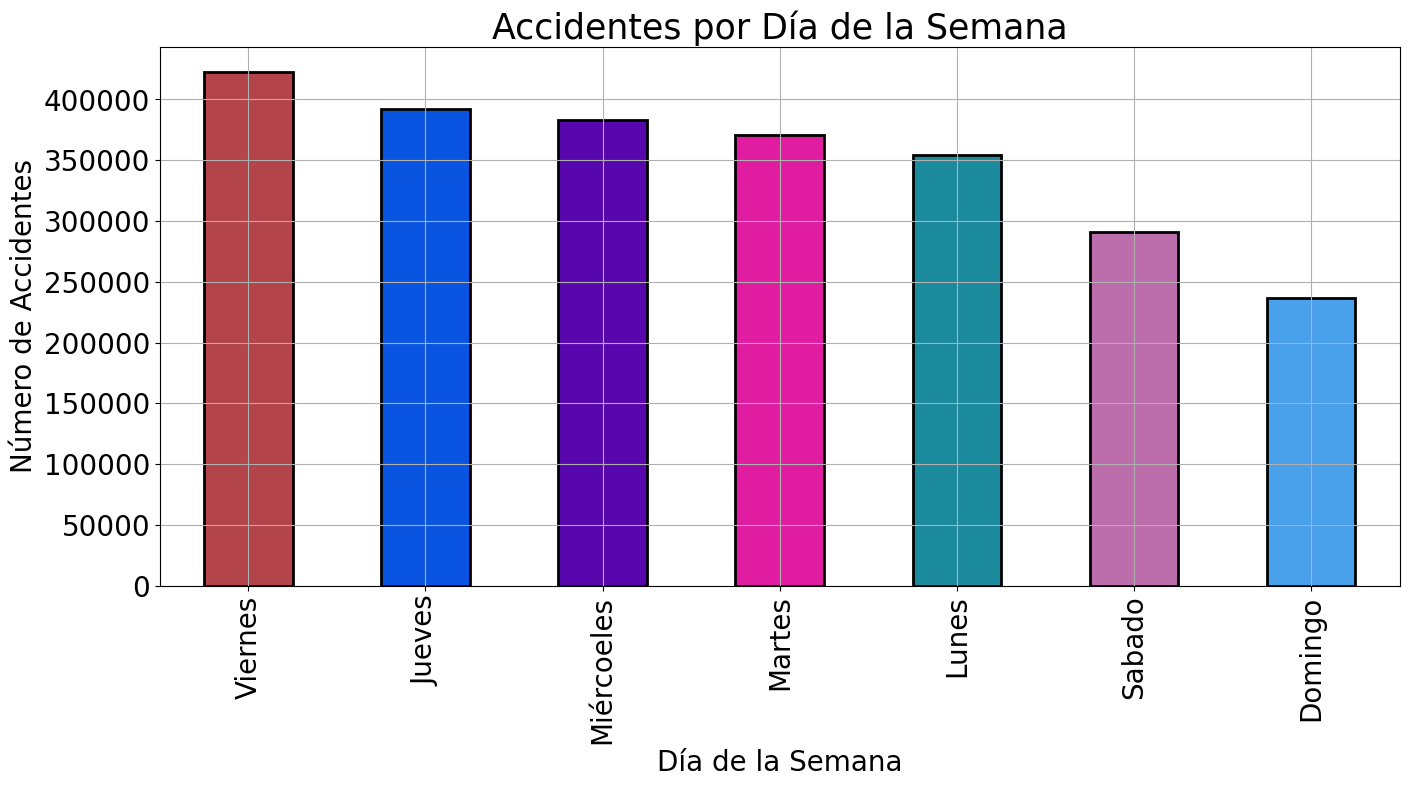

In [29]:
fig, ax=plt.subplots(figsize=(16,7))
datos['day_of_week'].value_counts().sort_values(ascending=False).head(7).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2, color = color)
plt.xlabel('Día de la Semana',fontsize=20)
plt.ylabel('Número de Accidentes',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('Accidentes por Día de la Semana',fontsize=25)
plt.grid()
plt.ioff()
plt.show()

## ¿Influye la Hora del Día ?

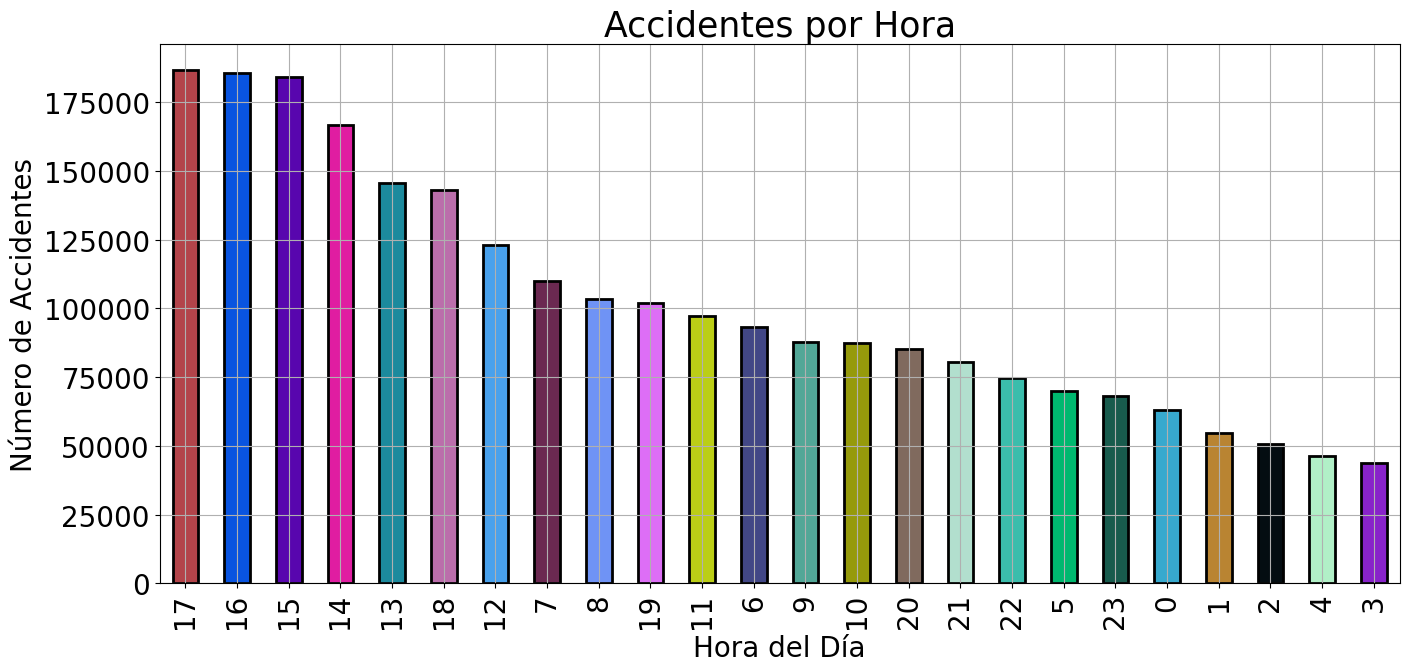

In [30]:
fig, ax=plt.subplots(figsize=(16,7))
datos['Hora'].value_counts().sort_values(ascending=False).head(24).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2, color = color)
plt.xlabel('Hora del Día',fontsize=20)
plt.ylabel('Número de Accidentes',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('Accidentes por Hora',fontsize=25)
plt.grid()
plt.ioff()
plt.show()

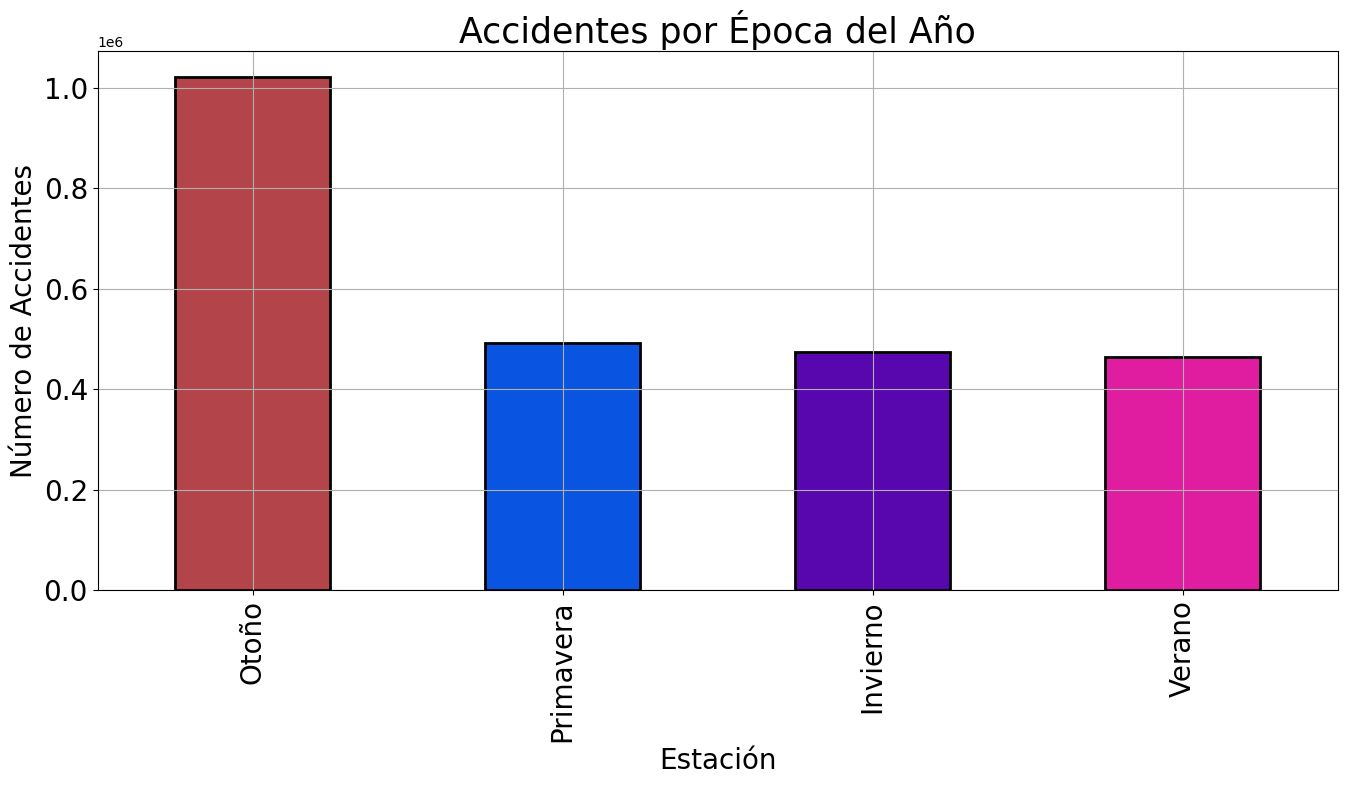

In [31]:
fig, ax=plt.subplots(figsize=(16,7))
datos['estacion_meteorologica'].value_counts().sort_values(ascending=False).head(7).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2, color = color)
plt.xlabel('Estación',fontsize=20)
plt.ylabel('Número de Accidentes',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('Accidentes por Época del Año',fontsize=25)
plt.grid()
plt.ioff()
plt.show()

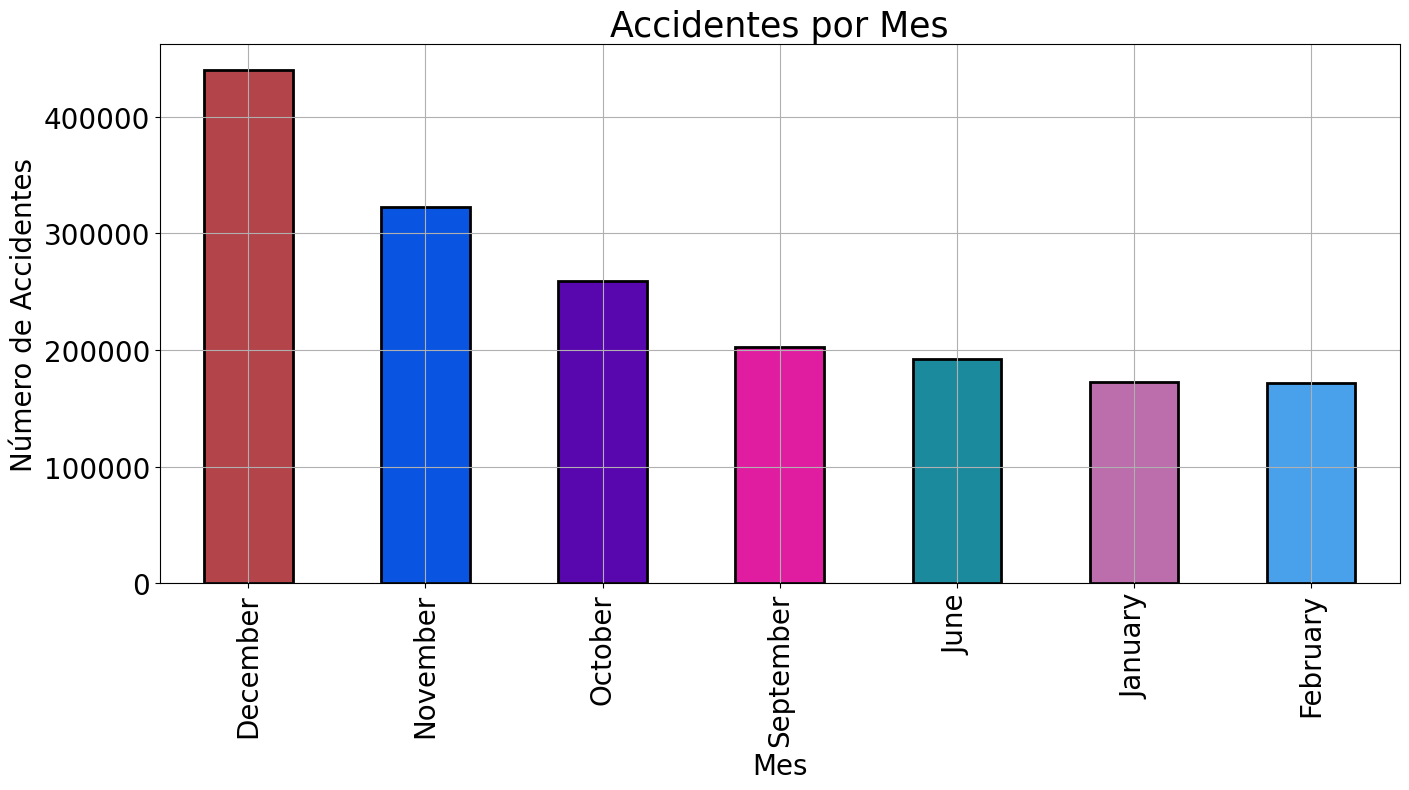

In [32]:
fig, ax=plt.subplots(figsize=(16,7))
datos['Mes'].value_counts().sort_values(ascending=False).head(7).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2, color = color)
plt.xlabel('Mes',fontsize=20)
plt.ylabel('Número de Accidentes',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('Accidentes por Mes',fontsize=25)
plt.grid()
plt.ioff()
plt.show()

# Recuento de Accidentes en AUTOPISTAS (Street)

Se puede observar que la mayoría de los accidente ocurren en las autopistas la sigla I-xxx significa ruta Interestatal y el sentido . Norte o Sur.

In [33]:
# crear un dataframe con Street y la cantidad de accidentes
street_df = pd.DataFrame( datos['Street'].value_counts()).reset_index().rename(columns={'index':'Street No.', 'Street':'Cases'})

In [35]:
top_ten_streets_df = pd.DataFrame(street_df.head(10))
top_ten_streets_df

,Street No.,Cases
0,I-5 N,32897
1,I-95 N,32115
2,I-95 S,30422
3,I-5 S,27500
4,I-10 E,22692
5,I-10 W,21693
6,I-80 W,13832
7,I-80 E,13806
8,I-84 E,10945
9,I-15 S,10871


In [36]:
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.patches as mpatches

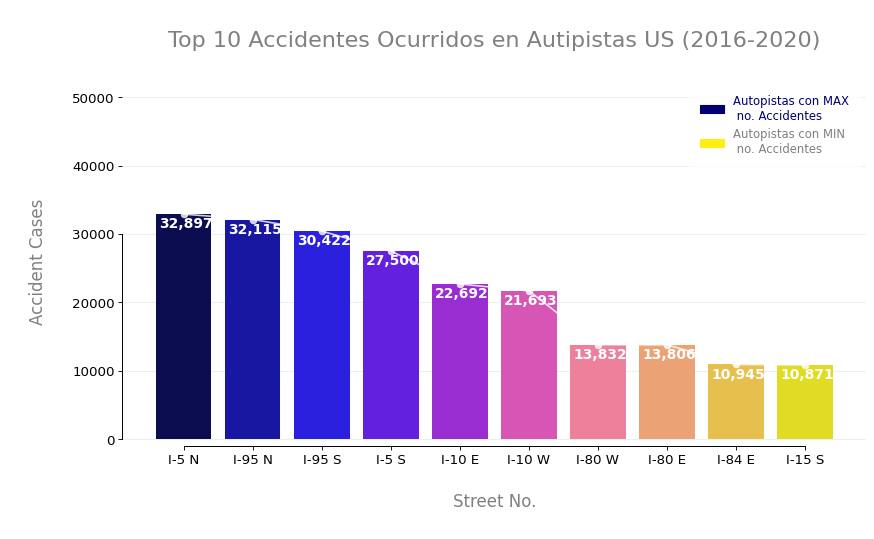

In [38]:
fig, ax = plt.subplots(figsize = (12,6), dpi = 80)

cmap = cm.get_cmap('gnuplot2', 10)
clrs = [mpl.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

ax=sns.barplot(y=top_ten_streets_df['Cases'], x=top_ten_streets_df['Street No.'], palette='gnuplot2')
ax1 = ax.twinx()
sns.lineplot(data = top_ten_streets_df, marker='o', x='Street No.', y='Cases', color = 'white', alpha = .8)

total = datos.shape[0]
for i in ax.patches:
    ax.text(i.get_x()+0.04, i.get_height()-2000, \
            '{:,d}'.format(int(i.get_height())), fontsize=12.5,weight='bold',
                color='white')

ax.axes.set_ylim(-1000, 53000)
ax1.axes.set_ylim(-1000, 53000)
plt.title('\nTop 10 Accidentes Ocurridos en Autipistas US (2016-2020)\n', size=20, color='grey')

ax1.axes.yaxis.set_visible(False)
ax.set_xlabel('\nStreet No.\n', fontsize=15, color='grey')
ax.set_ylabel('\nAccident Cases\n', fontsize=15, color='grey')

for i in ['top','right']:
    side1 = ax.spines[i]
    side1.set_visible(False)
    side2 = ax1.spines[i]
    side2.set_visible(False)


ax.set_axisbelow(True)
ax.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=.3)

ax.spines['bottom'].set_bounds(0.005, 9)
ax.spines['left'].set_bounds(0, 30000)
ax1.spines['bottom'].set_bounds(0.005, 9)
ax1.spines['left'].set_bounds(0, 30000)
ax.tick_params(axis='both', which='major', labelsize=12)

MA = mpatches.Patch(color=clrs[1], label='Autopistas con MAX\n no. Accidentes')
MI = mpatches.Patch(color=clrs[-2], label='Autopistas con MIN\n no. Accidentes')
ax.legend(handles=[MA, MI], prop={'size': 10.5}, loc='best', borderpad=1,
          labelcolor=[clrs[1], 'grey'], edgecolor='white');
plt.show()

# OUTLIERS


In [39]:
datos.describe()

,Severity,Start_Lat,Start_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Hora
count,2.451928e+06,2.451928e+06,2.451928e+06,2.451928e+06,2.384808e+06,2.451928e+06,2.451928e+06,2.451928e+06,2.451928e+06,2.451928e+06,2.451928e+06,2.451928e+06,2.451928e+06
mean,2.094920e+00,3.611920e+01,-9.717353e+01,7.005719e-01,8.110997e+03,6.133221e+01,5.967274e+01,6.469126e+01,2.939538e+01,9.037286e+00,7.228726e+00,8.207003e-03,1.281743e+01
std,4.187141e-01,5.421927e+00,1.834385e+01,1.542982e+00,1.706403e+04,1.870584e+01,2.104064e+01,2.291840e+01,1.088820e+00,2.668512e+00,5.549609e+00,1.444600e-01,5.919577e+00
min,1.000000e+00,2.456603e+01,-1.245481e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,2.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.320105e+01,-1.180464e+02,4.700000e-02,1.290000e+03,4.900000e+01,4.600000e+01,4.800000e+01,2.922000e+01,1.000000e+01,3.000000e+00,0.000000e+00,8.000000e+00
50%,2.000000e+00,3.584905e+01,-9.253631e+01,2.180000e-01,4.045000e+03,6.300000e+01,6.300000e+01,6.700000e+01,2.976000e+01,1.000000e+01,7.000000e+00,0.000000e+00,1.400000e+01
75%,2.000000e+00,4.008399e+01,-8.036868e+01,7.770000e-01,9.660000e+03,7.600000e+01,7.600000e+01,8.400000e+01,2.998000e+01,1.000000e+01,1.000000e+01,0.000000e+00,1.700000e+01
max,4.000000e+00,4.900058e+01,-6.748413e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01,2.300000e+01


Al comparar la media con el máximo && la media con el estándar, obtuvimos eso:

En la columna Start_Lat, std es mayor que la media --> valor atípico.
En la columna Start_Lng, std es mayor que la media --> valor atípico.

In [40]:
OutliersColumns = ["Start_Lat","Start_Lng"]

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [41]:
# for i in OutliersColumns:
#   # IQR
#   # Calculate the upper and lower limits
#   Q1 = df[i].quantile(0.25)
#   Q3 = df[i].quantile(0.75)
#   IQR = Q3 - Q1
#   lower = Q1 - 1.5*IQR
#   upper = Q3 + 1.5*IQR

#   # Create arrays of Boolean values indicating the outlier rows
#   upper_array = np.where(df[i]>=upper)[0]
#   lower_array = np.where(df[i]<=lower)[0]

#   # Removing the outliers
#   df = df[~df.index.isin(upper_array)]
#   df = df[~df.index.isin(lower_array)]

In [42]:
sampled_dff = datos.sample(frac=0.1, random_state=42)
sampled_dff.dropna(inplace=True)
categorical_cols = sampled_dff.select_dtypes(include=['object','bool','category']).columns
label_encoder = LabelEncoder()

for col in categorical_cols:
    sampled_dff[col] = label_encoder.fit_transform(sampled_dff[col])

X = sampled_dff.drop('Severity', axis=1)
y= sampled_dff['Severity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

rf_classifier = RandomForestClassifier()

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

# print(classification_task(rf_classifier,X_train, y_train ,X_test,y_test, y_pred,'rf'))
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Accuracy: 0.95
Confusion Matrix:
[[  334   388    27     0]
 [   61 65577   274    31]
 [   17  1482   935    14]
 [    1   934    45  1421]]
Classification Report:
              precision    recall  f1-score   support

           1       0.81      0.45      0.57       749
           2       0.96      0.99      0.98     65943
           3       0.73      0.38      0.50      2448
           4       0.97      0.59      0.73      2401

    accuracy                           0.95     71541
   macro avg       0.87      0.60      0.70     71541
weighted avg       0.95      0.95      0.95     71541



# **INGENIERÍA de FACTORES**
# Procesamiento y Selección de variables
La ingeniería de características es un paso crítico en el proceso de análisis de datos y aprendizaje automático, donde transformamos datos sin procesar en características significativas e informativas que pueden mejorar el rendimiento de los modelos predictivos. En el contexto del conjunto de datos de accidentes de EE. UU., la ingeniería de funciones eficaz puede mejorar significativamente nuestra comprensión de los patrones de accidentes, ayudarnos a construir modelos predictivos más precisos y, en última instancia, contribuir a carreteras y sistemas de transporte más seguros.

El conjunto de datos de Accidentes de EE. UU. nos proporciona una gran cantidad de información sobre accidentes de tráfico en los Estados Unidos. Sin embargo, los datos brutos a menudo contienen numerosas variables que pueden no ser directamente adecuadas para el modelado. Aquí es donde entra en juego la ingeniería de funciones.

En esta sección, exploraremos varias técnicas y consideraciones para la ingeniería de características específicas del conjunto de datos de Accidentes de EE. UU. Nuestro objetivo es derivar nuevas características o transformar las existentes que capturen los patrones, relaciones y factores subyacentes que influyen en los accidentes.

Eliminar columnas o características innecesarias de un conjunto de datos es una práctica común por varias razones:

**Reducción de dimensionalidad**: incluir una gran cantidad de características innecesarias o irrelevantes puede generar una alta dimensionalidad en su conjunto de datos. Trabajar con datos de alta dimensión puede ser costoso desde el punto de vista computacional y puede aumentar el riesgo de sobreajuste, donde un modelo aprende ruido en los datos en lugar de patrones verdaderos. Al eliminar columnas innecesarias, puede reducir la dimensionalidad de su conjunto de datos, lo que puede generar modelos más eficientes e interpretables.

**Reducción de ruido**: algunas columnas de un conjunto de datos pueden contener información ruidosa o irrelevante que no contribuye al poder predictivo de un modelo. Estas características ruidosas pueden introducir aleatoriedad y dificultar que un modelo se generalice bien a datos nuevos. Al eliminar dichas funciones, puede mejorar la relación señal-ruido en sus datos y mejorar el rendimiento del modelo.

**Simplificación e interpretabilidad**: eliminar columnas innecesarias puede simplificar el proceso de modelado y hacer que el modelo sea más interpretable. Un modelo más simple suele ser más fácil de entender, explicar y mantener. También puede ayudar a identificar los factores más importantes que contribuyen al resultado.

**Entrenamiento e inferencia más rápidos**: los conjuntos de datos más pequeños con menos características generalmente requieren menos recursos computacionales y tiempo para el entrenamiento y la inferencia del modelo. Esto puede ser crucial en situaciones donde la eficiencia es una preocupación, como aplicaciones en tiempo real o trabajar con grandes conjuntos de datos.

Después de una cuidadosa observación, se observaron las siguientes ideas:
**Description**, **ID**, **Country**, **Turning_loop**, **Airport_Code**, **ZipCode** se eliminarán porque estas columnas no proporcionarán nada informativo al modelo.

In [43]:
df2= datos.copy()

In [44]:
# df2.drop(columns =['Description', 'ID', 'Country','Turning_Loop','Airport_Code','Zipcode'],inplace = True)
df2.drop(columns =['Description','Country','Turning_Loop','ID'],inplace = True)

In [45]:
sampled_dff = df2.sample(frac=0.1, random_state=42)  # Para trabajar tomamos una muestra de los datos 10%

sampled_dff.dropna(inplace=True)

categorical_cols = sampled_dff.select_dtypes(include=['object','bool','category']).columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    sampled_dff[col] = label_encoder.fit_transform(sampled_dff[col])

X = sampled_dff.drop('Severity', axis=1)
y= sampled_dff['Severity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

rf_classifier = RandomForestClassifier()

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

# print(classification_task(rf_classifier,X_train, y_train ,X_test,y_test, y_pred,'rf'))
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Accuracy: 0.94
Confusion Matrix:
[[  341   378    29     1]
 [   60 65401   276   206]
 [   17  1418   913   100]
 [    5  1610   127   659]]
Classification Report:
              precision    recall  f1-score   support

           1       0.81      0.46      0.58       749
           2       0.95      0.99      0.97     65943
           3       0.68      0.37      0.48      2448
           4       0.68      0.27      0.39      2401

    accuracy                           0.94     71541
   macro avg       0.78      0.52      0.61     71541
weighted avg       0.93      0.94      0.93     71541



# Feature Creation
## Binning

Binning es el proceso de categorizar datos numéricos continuos en intervalos discretos o "contenedores". Esta transformación tiene varios propósitos esenciales en el preprocesamiento y análisis de datos. La agrupación no solo simplifica conjuntos de datos complejos, sino que también ayuda a descubrir patrones, mejora la interpretabilidad del modelo y puede ser particularmente valioso cuando se trata de algoritmos de aprendizaje automático que funcionan mejor con características categóricas o discretas.

Estas son algunas de las razones clave por las que empleamos el binning en la ingeniería de funciones:

**Simplificación de la complejidad**:  las características numéricas continuas, como la edad, los ingresos o la temperatura, pueden introducir complejidad en los modelos de aprendizaje automático. Binning nos permite agrupar estos valores continuos en categorías significativas, lo que facilita que los modelos capturen relaciones.

**Interpretabilidad de características**: las características discretizadas suelen ser más interpretables que las continuas. Proporcionan una estructura clara que permite a los expertos en el dominio y a las partes interesadas comprender cómo se relacionan los diferentes valores de características con la variable objetivo.

**Rendimiento del modelo**: la agrupación puede mejorar el rendimiento de ciertos algoritmos de aprendizaje automático, especialmente los modelos basados en árboles de decisión, mediante la creación de divisiones que mejoran la precisión de la predicción.

**Reducción del sobreajuste**: la agrupación puede ayudar a reducir el sobreajuste al simplificar el espacio de características y evitar que el modelo ajuste el ruido en los datos.

**En resumen**, el binning es una técnica crucial en la ingeniería de características que transforma datos numéricos continuos en categorías o intervalos discretos. Este proceso simplifica los datos, hace que las relaciones sean más interpretables y puede mejorar el rendimiento de los modelos de aprendizaje automático, particularmente cuando se trata de conjuntos de datos complejos o no lineales. Sin embargo, es esencial elegir cuidadosamente la estrategia de agrupación correcta y la cantidad de agrupaciones para garantizar que las características resultantes capturen de manera efectiva los patrones subyacentes en los datos.

In [46]:
categorical_cols = df2.select_dtypes(include=['object'])
categorical_cols.nunique()

Start_Time                1654515
End_Time                  2038137
Street                     151273
Side                            2
City                        10868
County                       1650
State                          49
Zipcode                    337351
Timezone                        4
Airport_Code                 1957
Weather_Timestamp          373585
Wind_Direction                 24
Weather_Condition             121
Sunrise_Sunset                  2
Civil_Twilight                  2
Nautical_Twilight               2
Astronomical_Twilight           2
Anio_Mes                       72
day_of_week                     7
Mes                            12
estacion_meteorologica          4
dtype: int64

Dado que la mayoría de las columnas categóricas tienen demasiados valores únicos, necesitaremos agrupar. Por lo tanto, tendremos que crear columnas adicionales o sobrescribir las columnas que tienen valores únicos > 20. Además, solo agruparemos las variables categóricas que tengan importancia de característica.

In [47]:
df2['Weather_Condition'].unique()

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Snow', 'Light Snow',
       'Cloudy', 'Scattered Clouds', 'Clear', 'Partly Cloudy',
       'Light Freezing Drizzle', 'Light Drizzle', 'Haze', 'Rain',
       'Heavy Rain', 'Fair', 'Drizzle', 'Fog',
       'Light Thunderstorms and Rain', 'Heavy Drizzle', 'Smoke',
       'Light Freezing Fog', 'Light Freezing Rain', 'Mist',
       'Blowing Snow', 'Heavy Thunderstorms and Rain', 'Heavy Snow',
       'Snow Grains', 'Patches of Fog', 'Light Fog',
       'Thunderstorms and Rain', 'Light Ice Pellets', 'Thunderstorm',
       'Shallow Fog', 'Thunder', 'Thunder in the Vicinity',
       'Fair / Windy', 'Light Rain with Thunder',
       'Heavy Thunderstorms and Snow', 'Cloudy / Windy',
       'Light Rain Showers', 'Ice Pellets', 'N/A Precipitation',
       'Rain Showers', 'Light Thunderstorms and Snow', 'T-Storm',
       'Rain / Windy', 'Wintry Mix', 'Squalls', 'Partly Cloudy / Windy',
       'Heavy T-Storm', 'Light Rain / Windy', 'Light Snow Shower

In [48]:
weather_bins = {
    'Clear': ['Clear', 'Fair'],
    'Cloudy': ['Cloudy', 'Mostly Cloudy', 'Partly Cloudy', 'Scattered Clouds'],
    'Rainy': ['Light Rain', 'Rain', 'Light Freezing Drizzle', 'Light Drizzle', 'Heavy Rain', 'Light Freezing Rain', 'Drizzle', 'Light Freezing Fog', 'Light Rain Showers', 'Showers in the Vicinity', 'T-Storm', 'Thunder', 'Patches of Fog', 'Heavy T-Storm', 'Heavy Thunderstorms and Rain', 'Funnel Cloud', 'Heavy T-Storm / Windy', 'Heavy Thunderstorms and Snow', 'Rain / Windy', 'Heavy Rain / Windy', 'Squalls', 'Heavy Ice Pellets', 'Thunder / Windy', 'Drizzle and Fog', 'T-Storm / Windy', 'Smoke / Windy', 'Haze / Windy', 'Light Drizzle / Windy', 'Widespread Dust / Windy', 'Wintry Mix', 'Wintry Mix / Windy', 'Light Snow with Thunder', 'Fog / Windy', 'Snow and Thunder', 'Sleet / Windy', 'Heavy Freezing Rain / Windy', 'Squalls / Windy', 'Light Rain Shower / Windy', 'Snow and Thunder / Windy', 'Light Sleet / Windy', 'Sand / Dust Whirlwinds', 'Mist / Windy', 'Drizzle / Windy', 'Duststorm', 'Sand / Dust Whirls Nearby', 'Thunder and Hail', 'Freezing Rain / Windy', 'Light Snow Shower / Windy', 'Partial Fog', 'Thunder / Wintry Mix / Windy', 'Patches of Fog / Windy', 'Rain and Sleet', 'Light Snow Grains', 'Partial Fog / Windy', 'Sand / Dust Whirlwinds / Windy', 'Heavy Snow with Thunder', 'Heavy Blowing Snow', 'Low Drifting Snow', 'Light Hail', 'Light Thunderstorm', 'Heavy Freezing Drizzle', 'Light Blowing Snow', 'Thunderstorms and Snow', 'Heavy Rain Showers', 'Rain Shower / Windy', 'Sleet and Thunder', 'Heavy Sleet and Thunder', 'Drifting Snow / Windy', 'Shallow Fog / Windy', 'Thunder and Hail / Windy', 'Heavy Sleet / Windy', 'Sand / Windy', 'Heavy Rain Shower / Windy', 'Blowing Snow Nearby', 'Blowing Sand', 'Heavy Rain Shower', 'Drifting Snow', 'Heavy Thunderstorms with Small Hail'],
    'Snowy': ['Light Snow', 'Snow', 'Light Snow / Windy', 'Snow Grains', 'Snow Showers', 'Snow / Windy', 'Light Snow and Sleet', 'Snow and Sleet', 'Light Snow and Sleet / Windy', 'Snow and Sleet / Windy'],
    'Windy': ['Blowing Dust / Windy', 'Fair / Windy', 'Mostly Cloudy / Windy', 'Light Rain / Windy', 'T-Storm / Windy', 'Blowing Snow / Windy', 'Freezing Rain / Windy', 'Light Snow and Sleet / Windy', 'Sleet and Thunder / Windy', 'Blowing Snow Nearby', 'Heavy Rain Shower / Windy'],
    'Hail': ['Hail'],
    'Volcanic Ash': ['Volcanic Ash'],
    'Tornado': ['Tornado']
}

def map_weather_to_bins(weather):
    for bin_name, bin_values in weather_bins.items():
        if weather in bin_values:
            return bin_name
    return 'Other'

df2['Weather_Bin'] = df2['Weather_Condition'].apply(map_weather_to_bins)
df2['Weather_Bin']

0           Rainy
1           Rainy
2           Other
3           Other
4           Rainy
            ...  
2845337     Clear
2845338     Clear
2845339    Cloudy
2845340     Clear
2845341     Clear
Name: Weather_Bin, Length: 2451928, dtype: object

In [50]:
df2.drop(columns=['Weather_Condition'], inplace=True)  # Luego de Agrupado BORRAMOS

In [51]:
df2['Street'].unique()

array(['Outerbelt E', 'I-70 E', 'I-75 S', ..., 'W 4000 S',
       ' San Marlo Way', '473-401 Cutoff Rd'], dtype=object)

In [52]:
# df2['Temperature_Category'] = pd.cut(df2['Temperature(F)'], bins=[-100, 50, 80, 200], labels=['Cold', 'Mild', 'Hot'])
# df2['Humidity_Level'] = pd.cut(df2['Humidity(%)'], bins=[0, 30, 70, 100], labels=['Low', 'Moderate', 'High'])

df2['Pressure_Category'] = pd.cut(df2['Pressure(in)'], bins=[0, 29.5, 30.2, 100], labels=['Low', 'Normal', 'High'])
df2['Visibility_Category'] = pd.cut(df2['Visibility(mi)'], bins=[0, 1, 5, 100], labels=['Poor', 'Moderate', 'Clear'])

In [53]:
df2.drop(columns=['Pressure(in)','Visibility(mi)'], inplace = True)

In [54]:
df2['State'].unique()

array(['OH', 'IN', 'KY', 'WV', 'MI', 'PA', 'CA', 'MN', 'TX', 'MO', 'CO',
       'LA', 'KS', 'IA', 'NE', 'WI', 'OK', 'ND', 'WY', 'NM', 'MS', 'SD',
       'MT', 'AR', 'NJ', 'IL', 'GA', 'FL', 'NY', 'CT', 'RI', 'SC', 'NC',
       'MD', 'MA', 'TN', 'VA', 'DC', 'ME', 'AL', 'NH', 'DE', 'VT', 'AZ',
       'ID', 'UT', 'NV', 'OR', 'WA'], dtype=object)

In [55]:
df2['City'].nunique()

10868

In [56]:
df2['County'].nunique()

1650

## **CLUSTERING**

La agrupación de coordenadas geográficas, a menudo representadas por valores de latitud y longitud, es una técnica valiosa de análisis de datos con una amplia gama de aplicaciones prácticas. Implica agrupar puntos de datos (ubicaciones) en función de su proximidad en el espacio físico. La principal motivación para agrupar coordenadas de latitud y longitud radica en su capacidad para revelar patrones significativos e información a partir de datos espaciales que tienen muchos valores únicos.

En esencia, agrupar coordenadas de latitud y longitud es una técnica poderosa que transforma datos geográficos en información procesable. Nos permite agrupar ubicaciones con características espaciales similares.

In [57]:
X = df2[['Start_Lat', 'Start_Lng']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

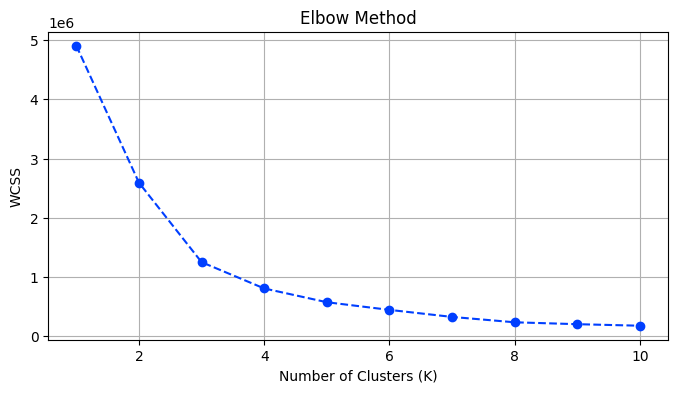

In [58]:
wcss = []
max_clusters = 10
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [59]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

df2['cluster_LatLng'] = clusters

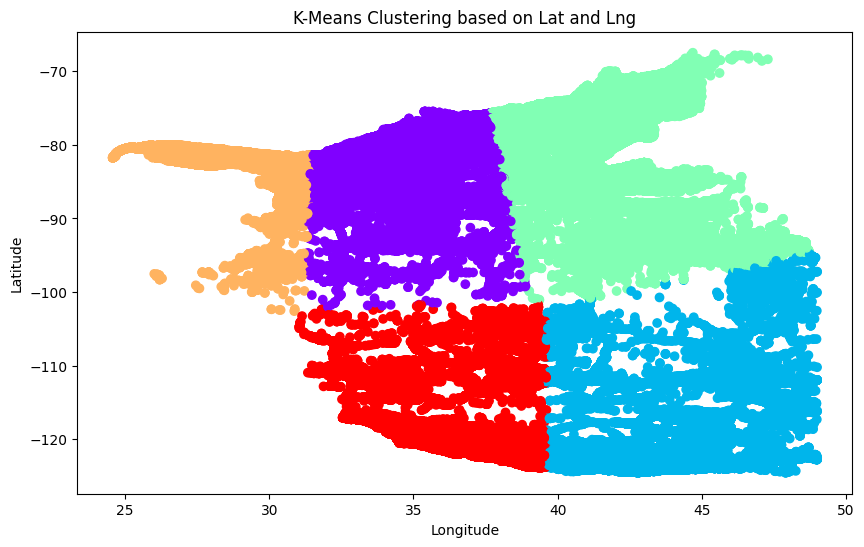

In [60]:
plt.figure(figsize=(10, 6))
plt.scatter(df2['Start_Lat'], df2['Start_Lng'], c=df2['cluster_LatLng'], cmap='rainbow')
plt.title('K-Means Clustering based on Lat and Lng')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [61]:
df2['cluster_LatLng'].unique()

array([2, 0, 4, 1, 3], dtype=int32)

Ahora podemos eliminar lat y lng después de agrupar lat y lng

In [62]:
df2.drop(columns=['Start_Lat','Start_Lng'],inplace = True)

### AHORA vamos por el CÓDIGO POSTAL, CODIGO AEROPUERTO y STREET y CIUDAD

In [63]:
label_encoder = LabelEncoder()

X = label_encoder.fit_transform(df2['Zipcode']).reshape(-1, 1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

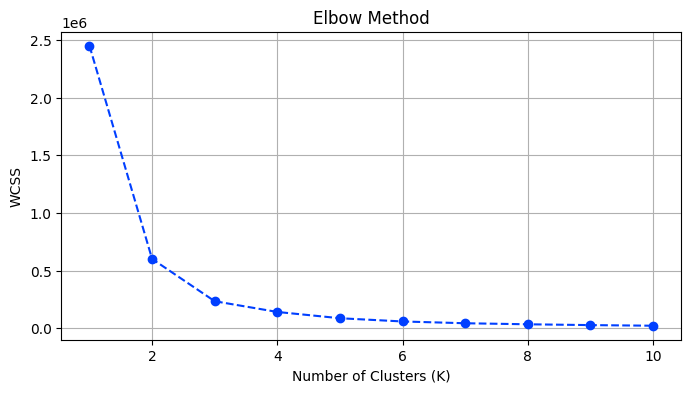

In [64]:
wcss = []
max_clusters = 10
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [65]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_scaled)

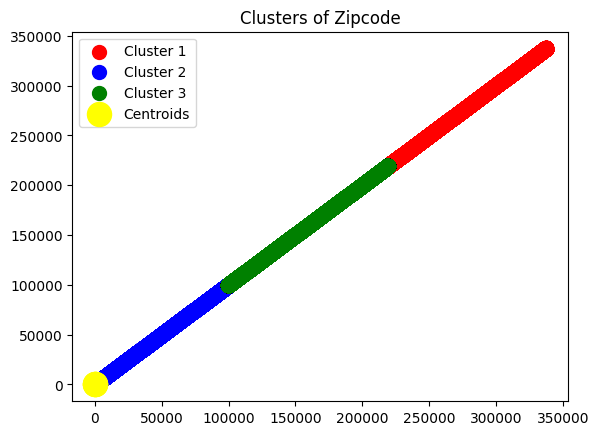

In [66]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 0], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 0], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 0], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 0], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters of Zipcode')
# plt.xlabel('Severity')
# plt.ylabel('ZipCode')
plt.legend()
plt.show()

In [67]:
df2['cluster_Zipcode'] = y_kmeans
df2['cluster_Zipcode'].unique()

array([2, 1, 0], dtype=int32)

In [68]:
X =label_encoder.fit_transform(df2['Airport_Code']).reshape(-1, 1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

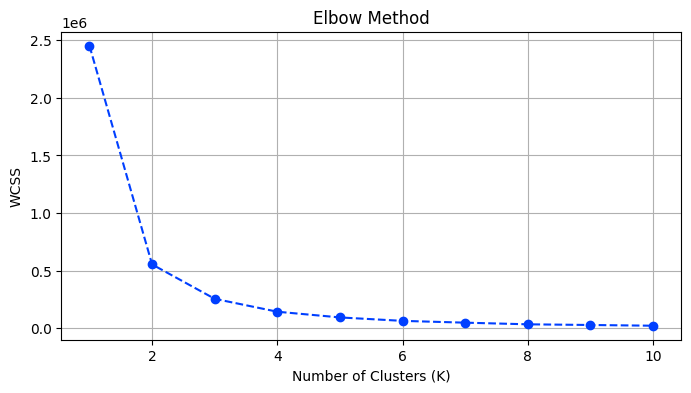

In [69]:
wcss = []
max_clusters = 10
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [70]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_scaled)

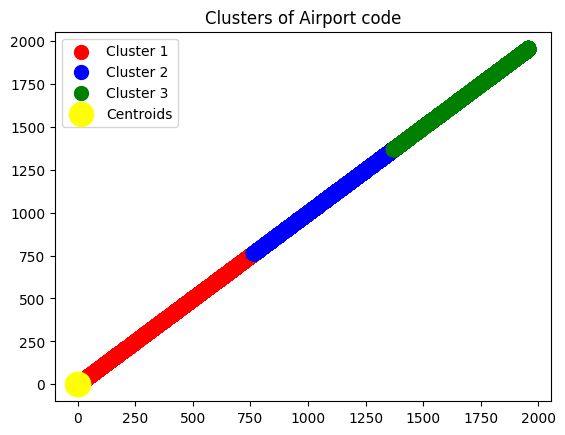

In [71]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 0], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 0], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 0], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 0], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters of Airport code')
# plt.xlabel('Severity')
# plt.ylabel('State')
plt.legend()
plt.show()

In [72]:
df2['cluster_Airport_Code'] = y_kmeans
df2['cluster_Airport_Code'].unique()

array([2, 0, 1], dtype=int32)

In [73]:
X = label_encoder.fit_transform(df2['Street']).reshape(-1, 1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

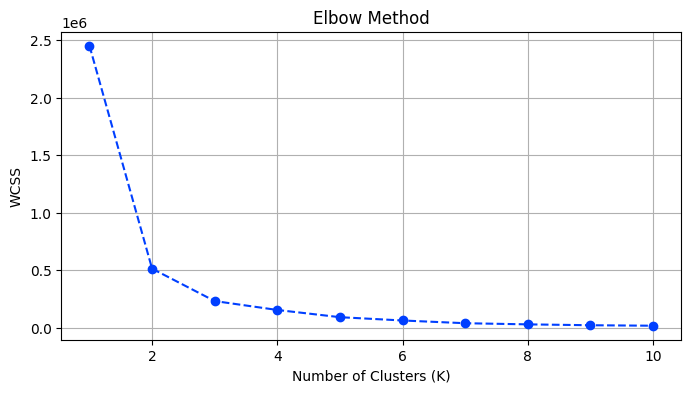

In [74]:
wcss = []
max_clusters = 10
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [75]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_scaled)

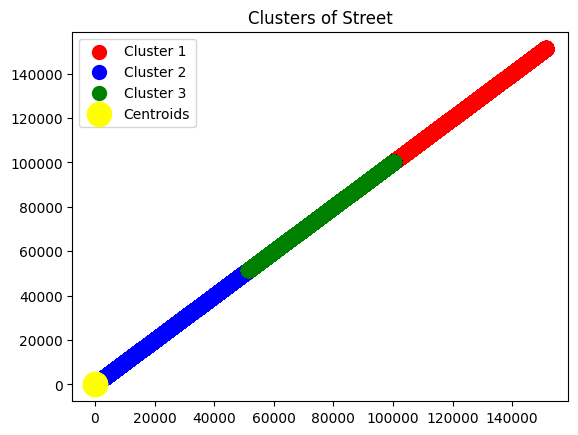

In [76]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 0], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 0], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 0], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 0], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters of Street')
# plt.xlabel('Severity')
# plt.ylabel('Street')
plt.legend()
plt.show()

In [77]:
df2['cluster_Street'] = y_kmeans
df2['cluster_Street'].unique()

array([0, 2, 1], dtype=int32)

In [78]:
X = label_encoder.fit_transform(df2['City']).reshape(-1, 1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

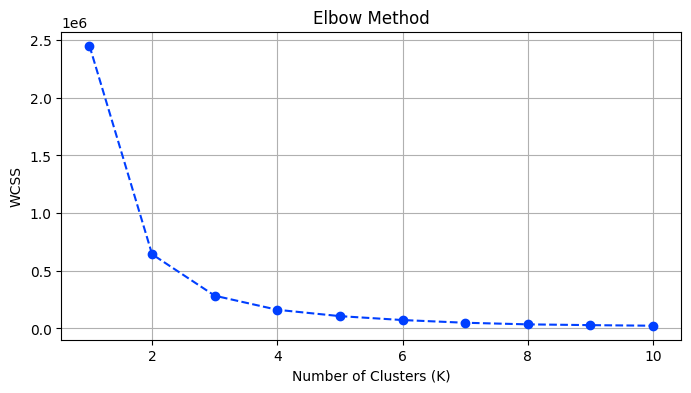

In [79]:
wcss = []
max_clusters = 10
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [74]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_scaled)

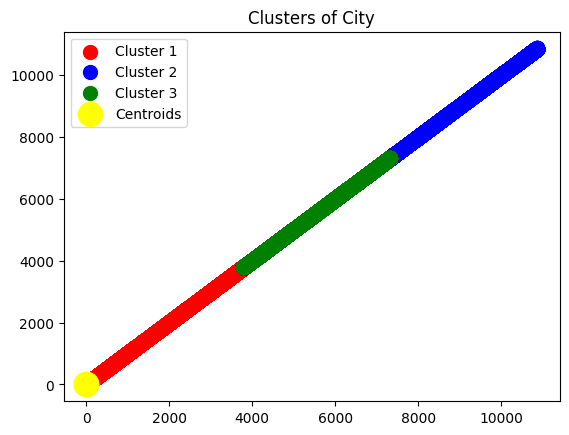

In [75]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 0], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 0], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 0], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 0], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters of City')
# plt.xlabel('Severity')
# plt.ylabel('Street')
plt.legend()
plt.show()

In [76]:
df2['cluster_City'] = y_kmeans
df2['cluster_City'].unique()

array([0, 1, 2], dtype=int32)

In [77]:
X = label_encoder.fit_transform(df2['County']).reshape(-1, 1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

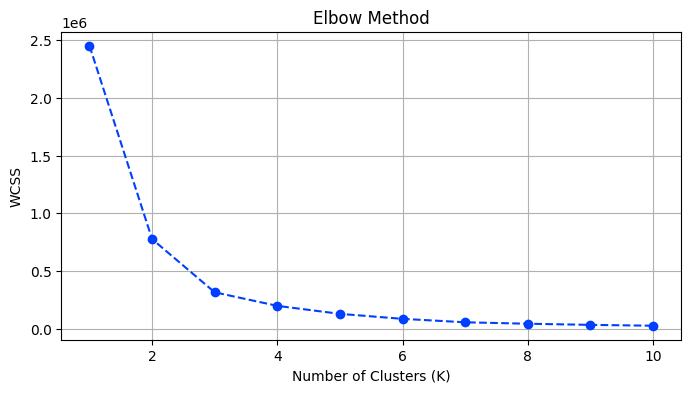

In [78]:
wcss = []
max_clusters = 10
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [79]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_scaled)

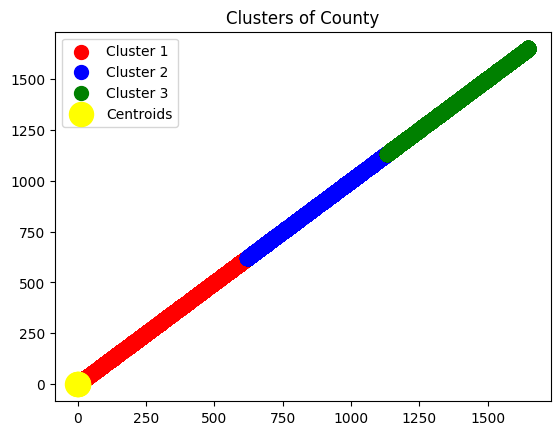

In [80]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 0], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 0], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 0], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 0], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters of County')
# plt.xlabel('Severity')
# plt.ylabel('Street')
plt.legend()
plt.show()

In [81]:
df2['cluster_County'] = y_kmeans
df2['cluster_County'].unique()

array([0, 1, 2], dtype=int32)

In [82]:
df2.columns

Index(['Severity', 'Start_Time', 'End_Time', 'Distance(mi)', 'Number',
       'Street', 'Side', 'City', 'County', 'State', 'Zipcode', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)',
       'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
       'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming',
       'Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight', 'Hora', 'Anio_Mes',
       'day_of_week', 'Mes', 'estacion_meteorologica', 'Weather_Bin',
       'Pressure_Category', 'Visibility_Category', 'cluster_LatLng',
       'cluster_Zipcode', 'cluster_Airport_Code', 'cluster_Street',
       'cluster_City', 'cluster_County'],
      dtype='object')

In [83]:
df2.drop(columns=['Zipcode','Airport_Code','Street','State','County'],inplace = True)

In [84]:
sampled_dff = df2.sample(frac=0.1, random_state=42)
sampled_dff.dropna(inplace=True)
categorical_cols = sampled_dff.select_dtypes(include=['object','bool','category']).columns
label_encoder = LabelEncoder()

for col in categorical_cols:
    sampled_dff[col] = label_encoder.fit_transform(sampled_dff[col])

X = sampled_dff.drop('Severity', axis=1)
y= sampled_dff['Severity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

rf_classifier = RandomForestClassifier()

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

# print(classification_task(rf_classifier,X_train, y_train ,X_test,y_test, y_pred,'rf'))
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Accuracy: 0.94
Confusion Matrix:
[[  261   469    31     2]
 [   45 65460   265   183]
 [   15  1550   668   102]
 [    6  1714   121   555]]
Classification Report:
              precision    recall  f1-score   support

           1       0.80      0.34      0.48       763
           2       0.95      0.99      0.97     65953
           3       0.62      0.29      0.39      2335
           4       0.66      0.23      0.34      2396

    accuracy                           0.94     71447
   macro avg       0.75      0.46      0.55     71447
weighted avg       0.92      0.94      0.92     71447



# **MANIPULACIÓN DE FECHAS**
En esencia, extraer características como mes, día y año de los tipos DateTime es un paso crítico en la preparación de datos temporales para análisis y modelado. Simplifica la información compleja de DateTime, mejora la interpretabilidad y permite que los modelos de aprendizaje automático descubran conocimientos y patrones significativos en los datos. Este proceso de ingeniería de funciones es especialmente valioso cuando se trata de conjuntos de datos centrados en el tiempo en diversos dominios, incluidos finanzas, atención médica y marketing.

In [85]:
# datos['Start_Time'] = datos['Start_Time'].astype(str)
# datos['End_Time'] = datos['End_Time'].astype(str)
# datos['Weather_Timestamp']= datos['Weather_Timestamp'].astype(str)

In [86]:
# df2['Start_Time']= datos['Start_Time']
# df2['End_Time']=datos['End_Time']
# df2['Weather_Timestamp']=datos['Weather_Timestamp']

In [87]:
df2['Start_Time']

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:51:45
4          2016-02-08 07:53:43
                  ...         
2845337    2019-08-23 18:03:25
2845338    2019-08-23 19:11:30
2845339    2019-08-23 19:00:21
2845340    2019-08-23 19:00:21
2845341    2019-08-23 18:52:06
Name: Start_Time, Length: 2451928, dtype: object

In [88]:
df2[['Start_Date', 'Start_Time']] = df2['Start_Time'].str.split(' ',expand=True)

In [89]:
df2['Start_Date'] = pd.to_datetime(df2['Start_Date'], format="%Y-%m-%d")

In [90]:
df2['Start_Date']

0         2016-02-08
1         2016-02-08
2         2016-02-08
3         2016-02-08
4         2016-02-08
             ...    
2845337   2019-08-23
2845338   2019-08-23
2845339   2019-08-23
2845340   2019-08-23
2845341   2019-08-23
Name: Start_Date, Length: 2451928, dtype: datetime64[ns]

In [91]:
df2['Start_Date'] = pd.to_datetime(df2['Start_Date'], format="%Y-%m-%d")

In [92]:
df2['Start_Time']

0          00:37:08
1          05:56:20
2          06:15:39
3          06:51:45
4          07:53:43
             ...   
2845337    18:03:25
2845338    19:11:30
2845339    19:00:21
2845340    19:00:21
2845341    18:52:06
Name: Start_Time, Length: 2451928, dtype: object

In [93]:
df2['Start_Time'] = pd.to_timedelta(df2['Start_Time'])
df2[['Weather_Date', 'Weather_Time']] = df2['Weather_Timestamp'].str.split(' ',expand=True)

In [94]:
df2['Weather_Date'] = pd.to_datetime(df2['Weather_Date'], format="%Y-%m-%d")
df2['Weather_Time'] = pd.to_timedelta(df2['Weather_Time'])
df2[['End_Date', 'End_Time']] = df2['End_Time'].str.split(' ',expand=True)
df2['End_Date'] = pd.to_datetime(df2['End_Date'], format="%Y-%m-%d")
df2['End_Time'] = pd.to_timedelta(df2['End_Time'])
df2['Start_Time'] = df2['Start_Time'].astype(str).str.replace('0 days ', '')

In [95]:
df2['Start_Time']

0          00:37:08
1          05:56:20
2          06:15:39
3          06:51:45
4          07:53:43
             ...   
2845337    18:03:25
2845338    19:11:30
2845339    19:00:21
2845340    19:00:21
2845341    18:52:06
Name: Start_Time, Length: 2451928, dtype: object

In [96]:
df2['Start_month'] = df2['Start_Date'].dt.month
df2['Start_day'] = df2['Start_Date'].dt.day
df2['Start_year'] = df2['Start_Date'].dt.year

In [97]:
df2[['Start_month','Start_day','Start_year']].head()

,Start_month,Start_day,Start_year
0,2,8,2016
1,2,8,2016
2,2,8,2016
3,2,8,2016
4,2,8,2016


In [98]:
df2['End_month'] = df2['End_Date'].dt.month
df2['End_day'] = df2['End_Date'].dt.day
df2['End_year'] = df2['End_Date'].dt.year

In [99]:
df2['Weather_month'] = df2['Weather_Date'].dt.month
df2['Weather_day'] = df2['Weather_Date'].dt.day
df2['Weather_year'] = df2['Weather_Date'].dt.year
parts = df2['Start_Time'].astype(str).str.split(':')

df2['Start_Hour'] = parts.str[0]
df2['Start_Mins'] = parts.str[1]
df2['Start_seconds'] = parts.str[2]

In [100]:
df2[['Start_Hour','Start_Mins','Start_seconds']].head()

,Start_Hour,Start_Mins,Start_seconds
0,00,37,08
1,05,56,20
2,06,15,39
3,06,51,45
4,07,53,43


In [101]:
parts = df2['End_Time'].astype(str).str.split(':')

df2['End_Hour'] = parts.str[0]
df2['End_Mins'] = parts.str[1]
df2['End_seconds'] = parts.str[2]

In [102]:
parts = df2['Weather_Time'].astype(str).str.split(':')

df2['Weather_Hour'] = parts.str[0]
df2['Weather_Mins'] = parts.str[1]
df2['Weather_seconds'] = parts.str[2]

In [103]:
parts

0          [0 days 00, 53, 00]
1          [0 days 05, 58, 00]
2          [0 days 05, 53, 00]
3          [0 days 06, 54, 00]
4          [0 days 07, 53, 00]
                  ...         
2845337    [0 days 17, 53, 00]
2845338    [0 days 18, 53, 00]
2845339    [0 days 18, 53, 00]
2845340    [0 days 18, 51, 00]
2845341    [0 days 20, 50, 00]
Name: Weather_Time, Length: 2451928, dtype: object

In [104]:
print(os.getcwd())

/content/gdrive/MyDrive/DScience_41870


In [105]:
file_path = '/df2.csv'
df2.to_csv(file_path, index=False)

In [106]:
# df2= pd.read_csv('/df2.csv')  # Grabar el archivo preprocesado

In [107]:
df2.dtypes

Severity                     int64
Start_Time                  object
End_Time           timedelta64[ns]
Distance(mi)               float64
Number                     float64
                        ...       
End_Mins                    object
End_seconds                 object
Weather_Hour                object
Weather_Mins                object
Weather_seconds             object
Length: 67, dtype: object

### ENRIQUECIMIENTO DEL MODELO

In [108]:
df2['Comfort_Index'] = (df2['Temperature(F)'] - 32) * (df2['Humidity(%)'] / 100)

In [109]:
df2['Comfort_Index'].head()

0    5.858
1    4.459
2    3.880
3    3.850
4    4.650
Name: Comfort_Index, dtype: float64

In [110]:
df2.drop(columns= ['Temperature(F)','Humidity(%)','Wind_Speed(mph)'],inplace = True)

In [112]:
datos['End_Time'] = pd.to_datetime(datos['End_Time'])
datos['Start_Time'] = pd.to_datetime(datos['Start_Time'])
df2['Accident_Duration'] = (datos['End_Time'] - datos['Start_Time']).dt.total_seconds() / 60.0

In [113]:
df2['Accident_Duration'].head()

0    360.0
1    360.0
2    360.0
3    360.0
4    360.0
Name: Accident_Duration, dtype: float64

In [114]:
Number_Accidents_Street = datos.groupby(['Street'])['ID'].count()
Number_Accidents_Street = Number_Accidents_Street.sort_values(ascending = False)
Number_Accidents_Street

Street
I-5 N                       32897
I-95 N                      32115
I-95 S                      30422
I-5 S                       27500
I-10 E                      22692
                            ...  
 Port Margate Pl                1
 Port Malabar Blvd NE           1
 Port Hudson Cemetery Rd        1
 Port Harrelson Rd              1
Zuni Rd SE                      1
Name: ID, Length: 151273, dtype: int64

In [115]:
def is_christmas(start_time):
    try:
        return start_time.month == 12 and start_time.day == 25
    except ValueError:
        print("error")
        return False

df2['Is_Christmas'] = df2['Start_Date'].apply(lambda x: 'Yes' if is_christmas(x) else 'No')

In [116]:
def categorize_rush_hour(start_time):
    parts = start_time.split(':')
    hour = parts[0]

    try:
        if 6 <= int(hour) < 10:  # Morning rush hour from 6 AM to 10 AM
            return 'Yes'
        elif 16 <= int(hour) < 19:  # Evening rush hour from 4 PM to 7 PM
            return 'Yes'
        else:
            return 'No'
    except ValueError:
        return 'Invalid'

df2['Is_Rush_Hour'] = df2['Start_Time'].apply(categorize_rush_hour)

In [117]:
df2['Is_Rush_Hour']

0           No
1           No
2          Yes
3          Yes
4          Yes
          ... 
2845337    Yes
2845338     No
2845339     No
2845340     No
2845341    Yes
Name: Is_Rush_Hour, Length: 2451928, dtype: object

In [119]:
df2.drop(columns=['End_Time','Start_Time','Weather_Time','Weather_Timestamp','Start_Date','End_Date','Weather_Date'],inplace=True)

In [120]:
sampled_dff = df2.sample(frac=0.1, random_state=42)
sampled_dff.dropna(inplace=True)
categorical_cols = sampled_dff.select_dtypes(include=['object','bool','category']).columns
label_encoder = LabelEncoder()

for col in categorical_cols:
    sampled_dff[col] = label_encoder.fit_transform(sampled_dff[col])

X = sampled_dff.drop('Severity', axis=1)
y= sampled_dff['Severity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

rf_classifier = RandomForestClassifier()

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

# print(classification_task(rf_classifier,X_train, y_train ,X_test,y_test, y_pred,'rf'))
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Accuracy: 0.94
Confusion Matrix:
[[  376   351    32     4]
 [   62 65493   244   154]
 [   26  1485   717   107]
 [   11  1711   121   553]]
Classification Report:
              precision    recall  f1-score   support

           1       0.79      0.49      0.61       763
           2       0.95      0.99      0.97     65953
           3       0.64      0.31      0.42      2335
           4       0.68      0.23      0.34      2396

    accuracy                           0.94     71447
   macro avg       0.76      0.51      0.58     71447
weighted avg       0.93      0.94      0.93     71447



## LABEL ENCODING

La codificación de etiquetas es una técnica valiosa en ingeniería de características que transforma datos categóricos en un formato numérico, lo que la hace adecuada para una amplia gama de algoritmos de aprendizaje automático.

Simplifica los datos, conserva la información ordinal y puede mejorar el rendimiento del modelo en determinadas situaciones. Los científicos de datos deben considerar cuidadosamente la naturaleza de los datos categóricos y los requisitos del algoritmo de aprendizaje automático elegido al decidir si utilizar codificación de etiquetas u otros métodos de codificación.

In [121]:
df2['End_Hour'] = df2['End_Hour'].str.replace('0 days', '')
df2['Weather_Hour'] = df2['Weather_Hour'].str.replace('0 days', '')
df2['Start_Hour'] = df2['Start_Hour'].str.replace('0 days', '')

In [122]:
columns_to_convert = [
    'Start_Mins', 'Weather_Hour', 'Weather_Mins', 'End_seconds',
    'Weather_seconds', 'End_Mins', 'End_Hour', 'Start_seconds', 'Start_Hour'
]

for column in columns_to_convert:
    df2[column] = df2[column].astype(int)

In [123]:
categorical_cols = df2.select_dtypes(include=['object','bool','category']).columns

label_encoder = LabelEncoder()

for col in categorical_cols:
    df2[col] = label_encoder.fit_transform(df2[col])

In [ ]:
df2.shape

## Matriz de correlación con mapa de calor
Una matriz de correlación es una herramienta fundamental en la ingeniería de características y el análisis de datos que nos ayuda a comprender las relaciones entre las variables en un conjunto de datos. Proporciona una matriz de coeficientes de correlación, que cuantifican el grado y la dirección de las asociaciones lineales entre pares de características. La matriz de correlación es valiosa por varias razones clave cuando se trabaja con datos:

**Identificación de relaciones**: permite a los científicos de datos identificar rápidamente si las variables están relacionadas entre sí y cómo. Las correlaciones positivas sugieren que cuando una variable aumenta, la otra tiende a aumentar también, mientras que las correlaciones negativas indican una relación inversa.

**Selección de características**: en ingeniería de características, se puede utilizar una matriz de correlación para la selección de características identificando características que están altamente correlacionadas con la variable objetivo. Es probable que estas características tengan una fuerte influencia en el objetivo y pueden priorizarse para el modelado.

**Detección de multicolinealidad**: las correlaciones altas entre variables predictivas (características independientes) pueden indicar multicolinealidad, donde dos o más características son redundantes y transmiten información similar. Detectar la multicolinealidad es esencial para que los modelos de regresión eviten problemas como estimaciones de coeficientes inestables.

In [ ]:
sampled_df = df2.sample(frac=0.1, random_state=42)
sampled_df.shape

(245193, 67)

In [ ]:
df_numerical = df2.select_dtypes(include=['int64','float64'])

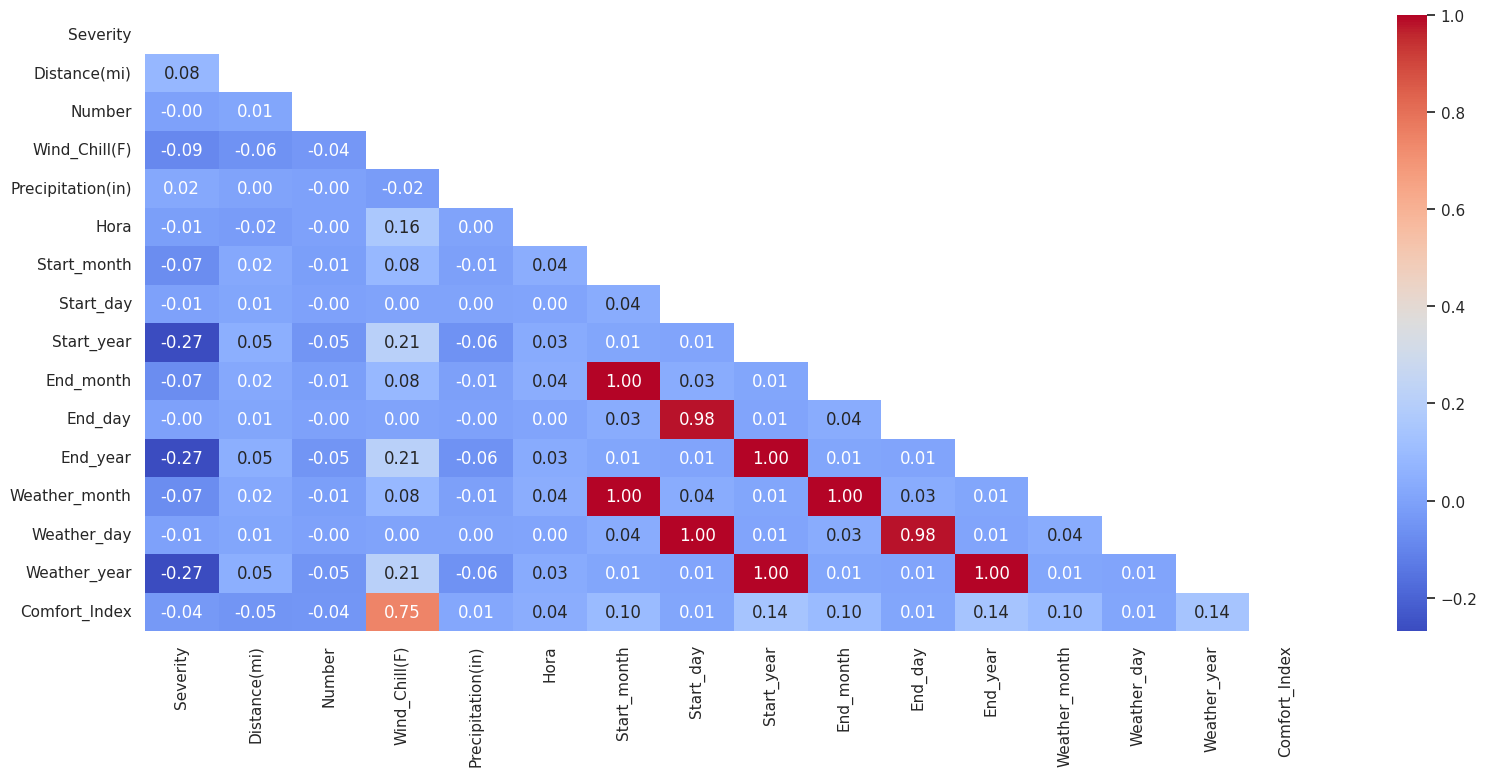

In [ ]:
plt.figure(figsize=(19, 8))
sns.set(style="white")
mask = np.triu(df_numerical.corr())
sns.heatmap(data=df_numerical.corr(), annot=True, fmt=".2f", cmap='coolwarm', mask=mask)
plt.show()